<a href="https://colab.research.google.com/github/AleemRahil/Robust-End-to-End-E-Commerce-Analytics-Automation-with-LLMs/blob/main/ECommerce_Analytics_Customer_Lifetime_Value_CLTV_No_LLMs_(Hand_written_code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Driving Business Value with CLV

Estimating Customer Lifetime Value (CLV) allows ecommerce businesses to grasp the real worth of their customers beyond immediate revenue. The traditional method of calculating CLV by simply adding up all transactions can be misleading, as it compares customers at various stages of their journey without accounting for differences in their lifecycle.

Understanding Customer Lifetime Value (CLV) is essential for ecommerce businesses. It helps in three ways: optimizing paid traffic, improving email marketing campaigns, and gaining insights from customer data.

Optimizing Paid Traffic: Knowing the CLV helps you spend your advertising budget wisely. You can see which channels bring in the most valuable customers and spend more money there. This leads to better results for the same or even lower costs.

Improving Email Marketing Campaigns: Knowing the CLV allows you to tailor your email campaigns more precisely by segmenting your customers based on their value. High-value customers could receive exclusive offers, motivating them to make additional purchases. For those who spend less, you can design email campaigns to engage them more deeply and gradually boost their spending.

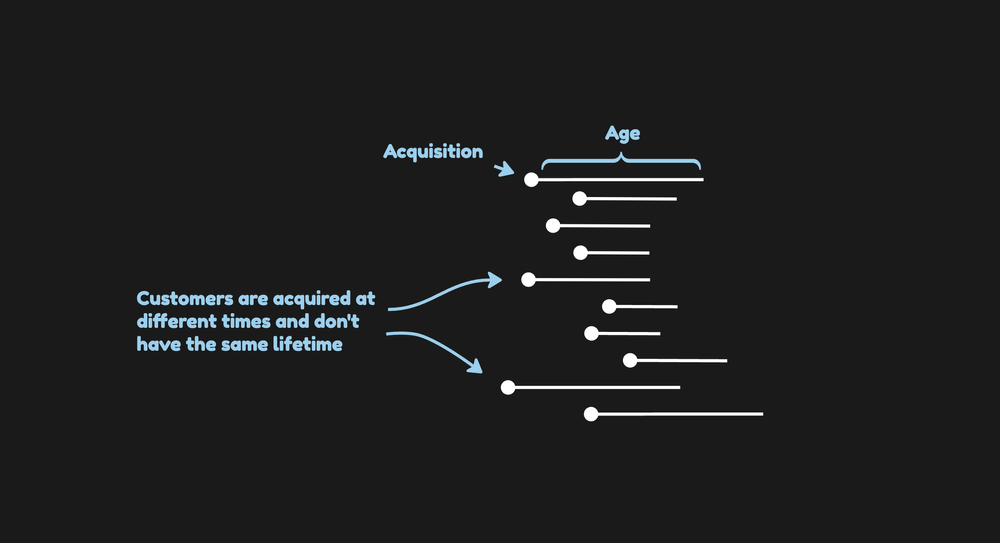

Another key reason for estimating CLV is to enable comparisons between your customers' values. Many ecommerce businesses rely on realized revenue, summing up all transaction values to determine the customer's value. This approach, however, leads to flawed comparisons, as you're essentially comparing customers at different stages of their lifecycle with your business.

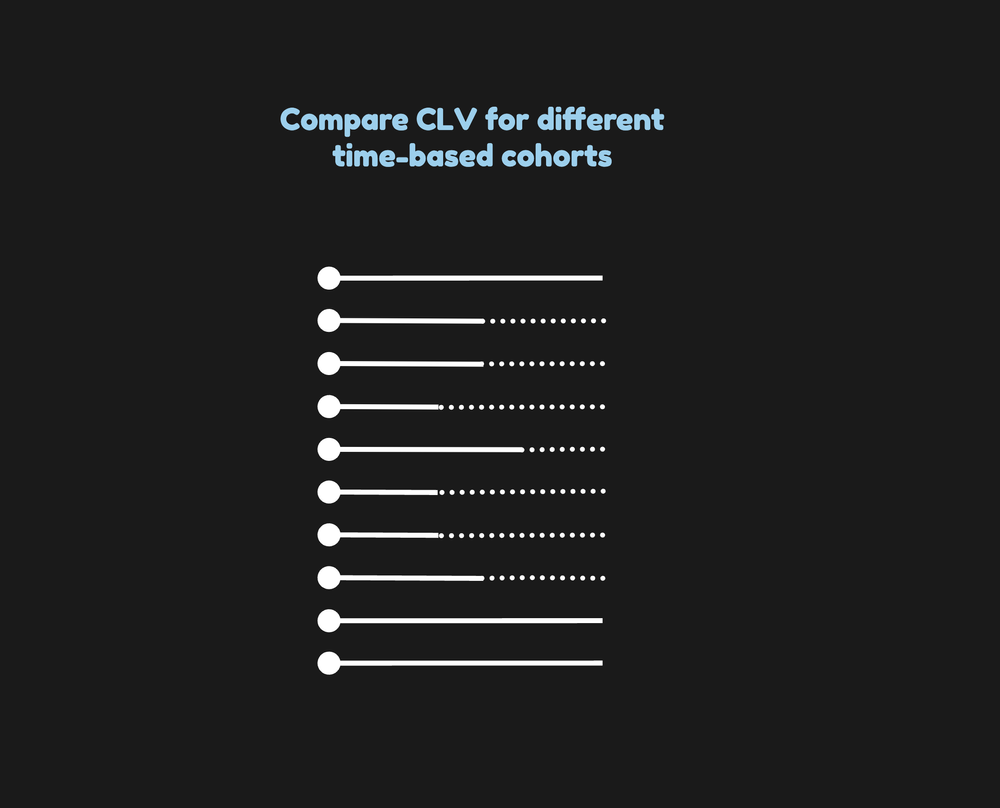

The challenge arises because customers come on board at various times, each with a different potential duration of interaction with our business. For instance, a customer who joined three months ago has had more opportunities to purchase than one who joined today. To make fair comparisons, it's essential to standardize the timeframe over which we evaluate CLV.

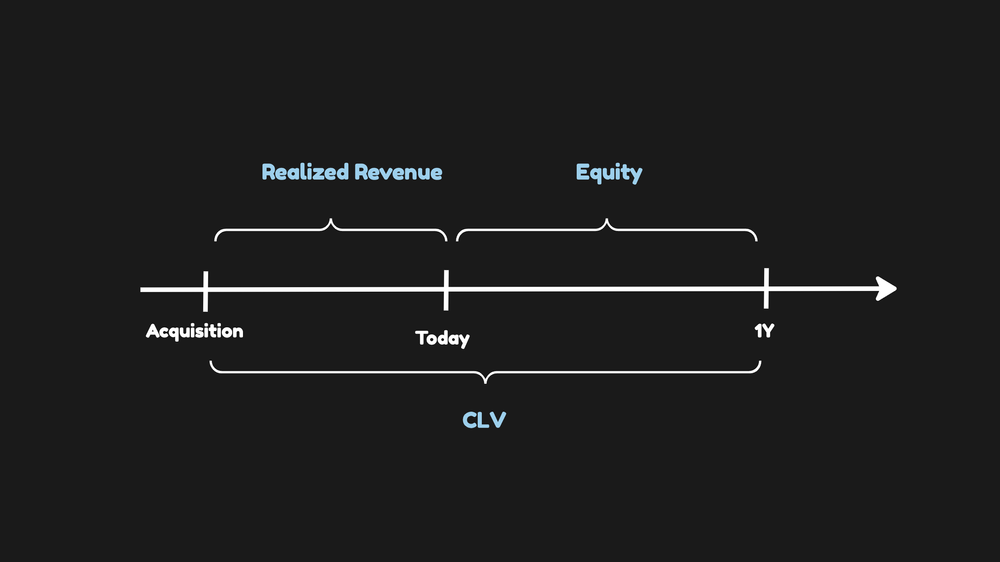

Predictive CLV modeling addresses this issue. For example, if you compare customers over a one-year horizon and you have a customer who was acquired three months ago, you would calculate their CLV by adding the revenue from their first three months to the forecasted revenue for the next nine months. This method produces a CLV that combines both realized and predicted revenue, offering a more accurate and equitable way to assess the value of different customers.

In [ ]:
from datetime import datetime, timedelta,date
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
import xgboost as xgb


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OnlineRetail.csv to OnlineRetail.csv


In [ ]:
import io

try:
    tx_data = pd.read_csv(io.BytesIO(uploaded['OnlineRetail.csv']), encoding='utf-8')
except UnicodeDecodeError:
    tx_data = pd.read_csv(io.BytesIO(uploaded['OnlineRetail.csv']), encoding='iso-8859-1')
tx_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [ ]:
tx_data['InvoiceDate'] = pd.to_datetime(tx_data['InvoiceDate'])

In [ ]:
tx_data['InvoiceDate'].describe()


count                           541909
mean     2011-07-04 13:34:57.156386048
min                2010-12-01 08:26:00
25%                2011-03-28 11:34:00
50%                2011-07-19 17:17:00
75%                2011-10-19 11:27:00
max                2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [ ]:
data_type = tx_data['InvoiceDate'].dtype
print("Data type of the column:", data_type)

Data type of the column: datetime64[ns]


In [ ]:
tx_uk = tx_data.query("Country=='United Kingdom'").reset_index(drop=True)


In [ ]:
date(2007, 12, 5)


datetime.date(2007, 12, 5)

In [ ]:
# Convert Python date objects to Pandas Timestamp objects
start_date = pd.Timestamp(date(2011, 3, 1))
end_date = pd.Timestamp(date(2011, 6, 1))

In [ ]:
# Use the converted Timestamp objects for comparison
tx_3m = tx_uk[(tx_uk.InvoiceDate < end_date) & (tx_uk.InvoiceDate >= start_date)].reset_index(drop=True)

In [ ]:
tx_3m['CustomerID'].count()

71683

In [ ]:
tx_6m = tx_uk[(tx_uk.InvoiceDate >= date(2011,6,1)) & (tx_uk.InvoiceDate < date(2011,12,1))].reset_index(drop=True)

In [ ]:
start_date_2 = pd.Timestamp(date(2011,6,1))
end_date_2 = pd.Timestamp(date(2011, 12, 1))

In [ ]:
tx_6m = tx_uk[(tx_uk.InvoiceDate >= start_date_2) & (tx_uk.InvoiceDate < end_date_2)].reset_index(drop=True)

In [ ]:
tx_6m['CustomerID'].count()

212734

In [ ]:
tx_3m['InvoiceDate'].describe()


count                            95193
mean     2011-04-15 21:47:37.643313920
min                2011-03-01 08:30:00
25%                2011-03-24 09:50:00
50%                2011-04-15 10:37:00
75%                2011-05-10 11:44:00
max                2011-05-31 15:53:00
Name: InvoiceDate, dtype: object

In [ ]:
tx_user = pd.DataFrame(tx_3m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [ ]:
tx_user.head()

,CustomerID
0,14620.0
1,14740.0
2,13880.0
3,16462.0
4,17068.0


In [ ]:
tx_user['CustomerID'].count()

1840

# **Recency**

In [ ]:
tx_max_purchase = tx_3m.groupby('CustomerID').InvoiceDate.max().reset_index()


In [ ]:
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']


In [ ]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days


In [ ]:
tx_max_purchase['MaxPurchaseDate'].max()

Timestamp('2011-05-31 15:32:00')

In [ ]:
tx_max_purchase['Recency']

0        6
1        0
2        7
3       21
4       62
        ..
1835    20
1836    65
1837    85
1838     8
1839     9
Name: Recency, Length: 1840, dtype: int64

In [ ]:
tx_max_purchase['Recency'][3]

21

In [ ]:
tx_max_purchase['MaxPurchaseDate'][3]

Timestamp('2011-05-09 15:51:00')

In [ ]:
tx_max_purchase['MaxPurchaseDate'][1]

Timestamp('2011-05-31 12:50:00')

In [ ]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')


In [ ]:
tx_user.head()


,CustomerID,Recency
0,14620.0,12
1,14740.0,4
2,13880.0,25
3,16462.0,91
4,17068.0,11


In [ ]:
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12747.0,2011-05-25 09:57:00,6
1,12748.0,2011-05-31 12:50:00,0
2,12749.0,2011-05-23 17:08:00,7
3,12821.0,2011-05-09 15:51:00,21
4,12823.0,2011-03-30 10:36:00,62


In [ ]:
tx_user.describe()

,CustomerID,Recency
count,1840.000000,1840.000000
mean,15534.587500,35.145652
std,1577.266588,26.231112
min,12747.000000,0.000000
25%,14197.250000,12.000000
50%,15554.500000,26.000000
75%,16841.500000,56.000000
max,18287.000000,91.000000


In [ ]:
import plotly.graph_objects as go


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define plot data
plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

# Define plot layout
plot_layout = go.Layout(
    title='Recency'
)

# Create a figure using make_subplots for compatibility with Google Colab
fig = make_subplots(rows=1, cols=1)

# Add histogram trace to the figure
for trace in plot_data:
    fig.add_trace(trace)

# Update layout
fig.update_layout(title='Recency')

# Display the plot in Colab using fig.show()
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

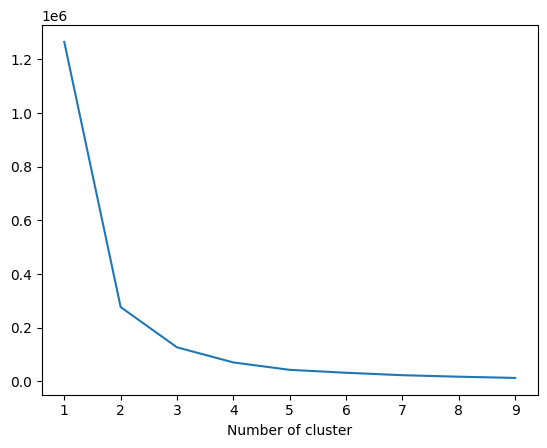

In [ ]:
sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
tx_user.groupby('RecencyCluster')['Recency'].describe()


,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,608.0,8.312500,4.404323,0.0,5.0,8.0,12.0,16.0
1,439.0,50.020501,7.377743,39.0,43.0,49.0,56.0,63.0
2,349.0,76.885387,8.373023,64.0,70.0,76.0,84.0,91.0
3,444.0,24.373874,4.959870,17.0,20.0,23.0,27.0,35.0


In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [ ]:
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)


# **Frequency**


In [ ]:
tx_frequency = tx_3m.groupby('CustomerID').InvoiceDate.count().reset_index()


In [ ]:
tx_frequency.columns = ['CustomerID','Frequency']


In [ ]:
tx_frequency.head()


,CustomerID,Frequency
0,12747.0,35
1,12748.0,582
2,12749.0,54
3,12821.0,6
4,12823.0,1


In [ ]:
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')


In [ ]:
tx_user.head()


,CustomerID,Recency,RecencyCluster,Frequency
0,14620.0,12,3,30
1,14740.0,4,3,89
2,17068.0,11,3,76
3,12971.0,4,3,73
4,15194.0,6,3,64


In [ ]:
tx_user.Frequency.describe()


count    1840.000000
mean       38.958152
std        60.968929
min         1.000000
25%        12.000000
50%        23.000000
75%        47.000000
max      1364.000000
Name: Frequency, dtype: float64

In [ ]:
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-54-30fc047d5744>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-54-30fc047d5744>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

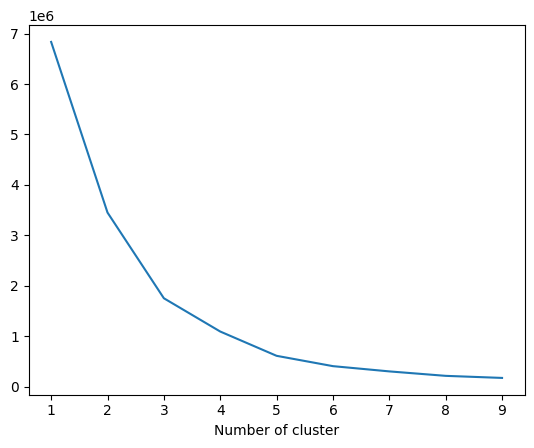

In [ ]:
sse={}
tx_frequency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_frequency)
    tx_frequency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
tx_user.groupby('FrequencyCluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,1605.0,24.218069,17.761893,1.0,10.0,20.0,36.0,70.0
1,11.0,496.000000,125.912668,331.0,422.5,452.0,570.0,730.0
2,223.0,116.560538,43.816927,71.0,83.5,104.0,131.5,285.0
3,1.0,1364.000000,NaN,1364.0,1364.0,1364.0,1364.0,1364.0


In [ ]:
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)


# **Monetary Value**

In [ ]:
tx_3m['Revenue'] = tx_3m['UnitPrice'] * tx_3m['Quantity']

In [ ]:
tx_revenue = tx_3m.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
tx_revenue.head()

,CustomerID,Revenue
0,12747.0,1082.09
1,12748.0,4336.73
2,12749.0,782.10
3,12821.0,92.72
4,12823.0,459.00


In [ ]:
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

In [ ]:
tx_user.Revenue.describe()


count     1840.000000
mean       738.715017
std       1640.430156
min      -1462.500000
25%        210.237500
50%        369.825000
75%        749.490000
max      35085.480000
Name: Revenue, dtype: float64

In [ ]:
plot_data = [
    go.Histogram(
        x=tx_user.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

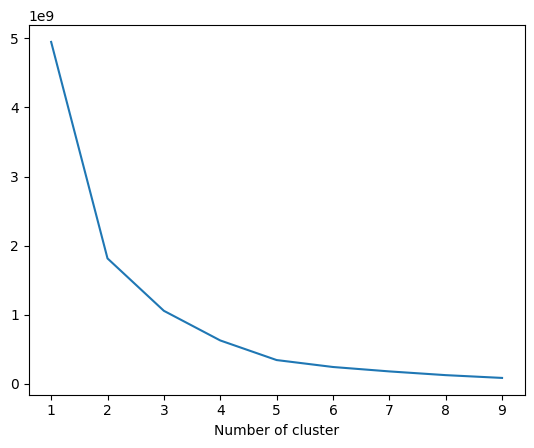

In [ ]:
sse={}
tx_revenue = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_revenue)
    tx_revenue["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

In [ ]:
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)


In [ ]:
tx_user.groupby('RevenueCluster')['Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,1756.0,504.760245,444.567580,-1462.50,204.3075,349.590,666.8325,2131.72
1,72.0,3760.423486,1538.877714,2159.16,2685.1875,3141.610,4222.5050,7969.99
2,10.0,14092.686000,2855.109881,10348.13,11268.3675,15124.345,16124.8250,17700.64
3,2.0,30599.645000,6343.928696,26113.81,28356.7275,30599.645,32842.5625,35085.48


In [ ]:
tx_user.groupby('RevenueCluster')['Revenue'].max()

RevenueCluster
0     2131.72
1     7969.99
2    17700.64
3    35085.48
Name: Revenue, dtype: float64

# **Overall Segmentation**


In [ ]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,14620.0,12,3,30,0,393.28,0
1,15194.0,6,3,64,0,1439.02,0
2,18044.0,5,3,57,0,808.96,0
3,18075.0,12,3,35,0,638.12,0
4,15241.0,0,3,64,0,947.55,0


In [ ]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

In [ ]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore
0,14620.0,12,3,30,0,393.28,0,3
1,15194.0,6,3,64,0,1439.02,0,3
2,18044.0,5,3,57,0,808.96,0,3
3,18075.0,12,3,35,0,638.12,0,3
4,15241.0,0,3,64,0,947.55,0,3


In [ ]:
tx_user.groupby('OverallScore')[['Recency', 'Frequency', 'Revenue']].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,77.014925,18.432836,295.824239
1,50.887828,24.522673,367.334177
2,26.590476,31.028571,500.973095
3,10.243902,36.652439,633.871402
4,8.109375,103.835938,1983.985086
5,6.482759,138.965517,4326.155172
6,7.357143,322.071429,12177.627143
7,3.000000,779.333333,11350.896667


In [ ]:
tx_user.groupby('OverallScore')['Recency'].count()

OverallScore
0    335
1    419
2    420
3    492
4    128
5     29
6     14
7      3
Name: Recency, dtype: int64

In [ ]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value'
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value'

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# **LTV**

In [ ]:
tx_user.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value
2,18044.0,5,3,57,0,808.96,0,3,Mid-Value
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value


In [ ]:
tx_6m.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom


In [ ]:
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']

In [ ]:
tx_user_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID','m6_Revenue']

In [ ]:
tx_user_6m.head()

,CustomerID,m6_Revenue
0,12747.0,1666.11
1,12748.0,18679.01
2,12749.0,2323.04
3,12820.0,561.53
4,12822.0,918.98


In [ ]:
tx_6m.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom,22.50
1,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom,16.95
2,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom,66.40
3,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom,32.70
4,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom,51.00


In [ ]:
plot_data = [
    go.Histogram(
        x=tx_user_6m.query('m6_Revenue < 10000')['m6_Revenue']
    )
]

plot_layout = go.Layout(
        title='6m Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='CustomerID', how='left')

In [ ]:
tx_merge.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,NaN
1,15194.0,6,3,64,0,1439.02,0,3,Mid-Value,3232.20
2,18044.0,5,3,57,0,808.96,0,3,Mid-Value,991.54
3,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75
4,15241.0,0,3,64,0,947.55,0,3,Mid-Value,791.04


In [ ]:
count_nan = tx_merge['Segment'].isnull().sum()

In [ ]:
count_nan

0

In [ ]:
tx_user_count = len(tx_user)
tx_user_count

1840

In [ ]:
tx_merge_count = len(tx_merge)

In [ ]:
tx_merge_count

1840

In [ ]:
tx_merge = tx_merge.fillna(0)


In [ ]:
tx_merge.groupby('Segment')['m6_Revenue'].mean()


Segment
High-Value    17968.362609
Low-Value       703.559983
Mid-Value      1718.212598
Name: m6_Revenue, dtype: float64

In [ ]:
tx_graph = tx_merge.query("m6_Revenue < 30000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Low-Value'")['m6_Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Mid-Value'")['m6_Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'High-Value'")['m6_Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "6m LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

In [ ]:
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

In [ ]:
tx_merge.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1397.0,398.393172,422.252144,-609.40,0.0000,298.000,687.7200,1448.78
1,368.0,2501.323098,936.361335,1464.05,1739.9875,2165.315,3054.7925,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.4350,6986.545,9607.3225,16756.31


In [ ]:
tx_cluster = tx_merge.copy()


In [ ]:
tx_cluster.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,14620.0,12,3,30,0,393.28,0,3,Mid-Value,0.00,0
1,18044.0,5,3,57,0,808.96,0,3,Mid-Value,991.54,0
2,18075.0,12,3,35,0,638.12,0,3,Mid-Value,1322.75,0
3,15241.0,0,3,64,0,947.55,0,3,Mid-Value,791.04,0
4,15660.0,4,3,34,0,484.62,0,3,Mid-Value,858.09,0


In [ ]:
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,1397.0,398.393172,422.252144,-609.40,0.0000,298.000,687.7200,1448.78
1,368.0,2501.323098,936.361335,1464.05,1739.9875,2165.315,3054.7925,5287.39
2,56.0,8222.565893,2983.572030,5396.44,6151.4350,6986.545,9607.3225,16756.31


In [ ]:
tx_class = pd.get_dummies(tx_cluster)


In [ ]:
tx_class.head()


,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,14620.0,12,3,30,0,393.28,0,3,0.00,0,False,False,True
1,18044.0,5,3,57,0,808.96,0,3,991.54,0,False,False,True
2,18075.0,12,3,35,0,638.12,0,3,1322.75,0,False,False,True
3,15241.0,0,3,64,0,947.55,0,3,791.04,0,False,False,True
4,15660.0,4,3,34,0,484.62,0,3,858.09,0,False,False,True


In [ ]:
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.846486
Revenue               0.600919
RevenueCluster        0.468524
OverallScore          0.374182
FrequencyCluster      0.364976
Frequency             0.359304
Segment_High-Value    0.353371
RecencyCluster        0.238332
Segment_Mid-Value     0.168752
CustomerID           -0.027701
Recency              -0.239131
Segment_Low-Value    -0.266561
Name: LTVCluster, dtype: float64

In [ ]:
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)


In [ ]:
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.91
Accuracy of XGB classifier on test set: 0.75


In [ ]:
tx_class.groupby('LTVCluster').CustomerID.count()/tx_class.CustomerID.count()


LTVCluster
0    0.767161
1    0.202087
2    0.030752
Name: CustomerID, dtype: float64

In [ ]:
y_pred = ltv_xgb_model.predict(X_test)
